In [21]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\dobil\\Downloads\\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df.shape

(614, 13)

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.drop("Loan_ID", axis=1, inplace=True)


In [28]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
df = pd.get_dummies(df, drop_first=True)


C:\Users\dobil\AppData\Local\Temp\ipykernel_2844\988112577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\dobil\AppData\Local\Temp\ipykernel_2844\988112577.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

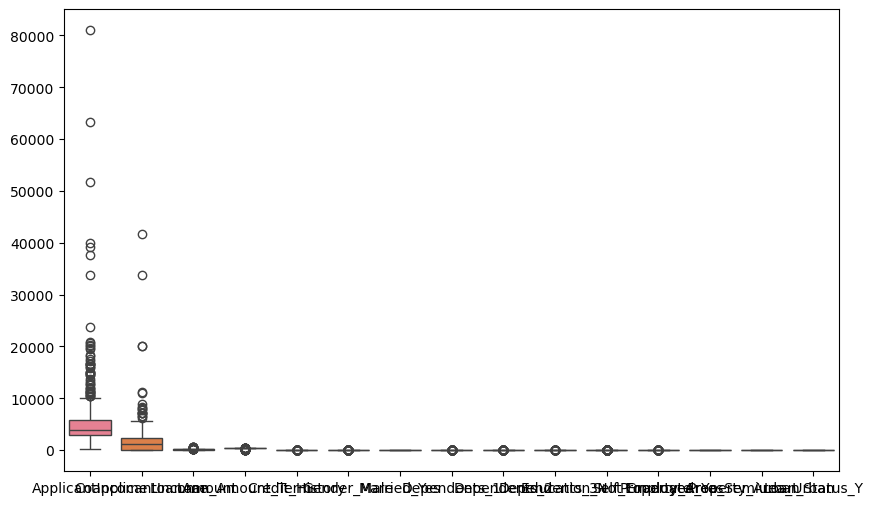

In [29]:
#checking outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))  
sns.boxplot(data=df)
plt.show()





In [30]:
X = df.drop("Loan_Status_Y", axis=1)
y = df["Loan_Status_Y"]  


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2
,random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [34]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train_scaled,y_train)
y_pred=svm_linear.predict(x_test_scaled)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [35]:
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train_scaled,y_train)
y_pred=svm_poly.predict(x_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7967479674796748
Confusion Matrix:
 [[18 25]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.42      0.59        43
        True       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [36]:
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(x_train_scaled,y_train)
y_pred=svm_rbf.predict(x_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7967479674796748
Confusion Matrix:
 [[18 25]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.42      0.59        43
        True       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



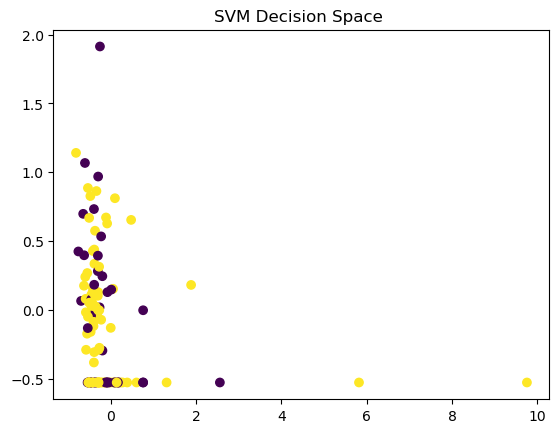

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_test_scaled[:,0], x_test_scaled[:,1], c=y_test)
plt.title("SVM Decision Space ")
plt.show()
